<a href="https://colab.research.google.com/github/moreabhishek800/machinelearning/blob/main/software_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [1]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.3
astunparse                       1.6.3
async-timeout                    4.0.3
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0
blinker                          1.4
bl

In [2]:
import tensorflow as tf
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import imghdr

In [6]:
data_dir = "/content/drive/MyDrive/New folder"

In [7]:
image_exts = ['jpeg','jpg', 'png']

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))


Issue with image /content/drive/MyDrive/New folder/yes/24.jpg
Issue with image /content/drive/MyDrive/New folder/yes/21_HGE_Seg.jpg
Issue with image /content/drive/MyDrive/New folder/yes/12.jpg
Issue with image /content/drive/MyDrive/New folder/yes/16.jpg
Issue with image /content/drive/MyDrive/New folder/yes/10.jpg
Issue with image /content/drive/MyDrive/New folder/yes/25.jpg
Issue with image /content/drive/MyDrive/New folder/yes/22_HGE_Seg.jpg
Issue with image /content/drive/MyDrive/New folder/yes/27.jpg
Issue with image /content/drive/MyDrive/New folder/yes/20_HGE_Seg.jpg
Issue with image /content/drive/MyDrive/New folder/yes/1.jpg
Issue with image /content/drive/MyDrive/New folder/yes/15_HGE_Seg.jpg
Issue with image /content/drive/MyDrive/New folder/yes/23.jpg
Issue with image /content/drive/MyDrive/New folder/yes/23_HGE_Seg.jpg
Issue with image /content/drive/MyDrive/New folder/yes/15.jpg
Issue with image /content/drive/MyDrive/New folder/yes/16_HGE_Seg.jpg
Issue with image /conte

# 3. Load Data

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [12]:
data = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/New folder")

Found 314 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

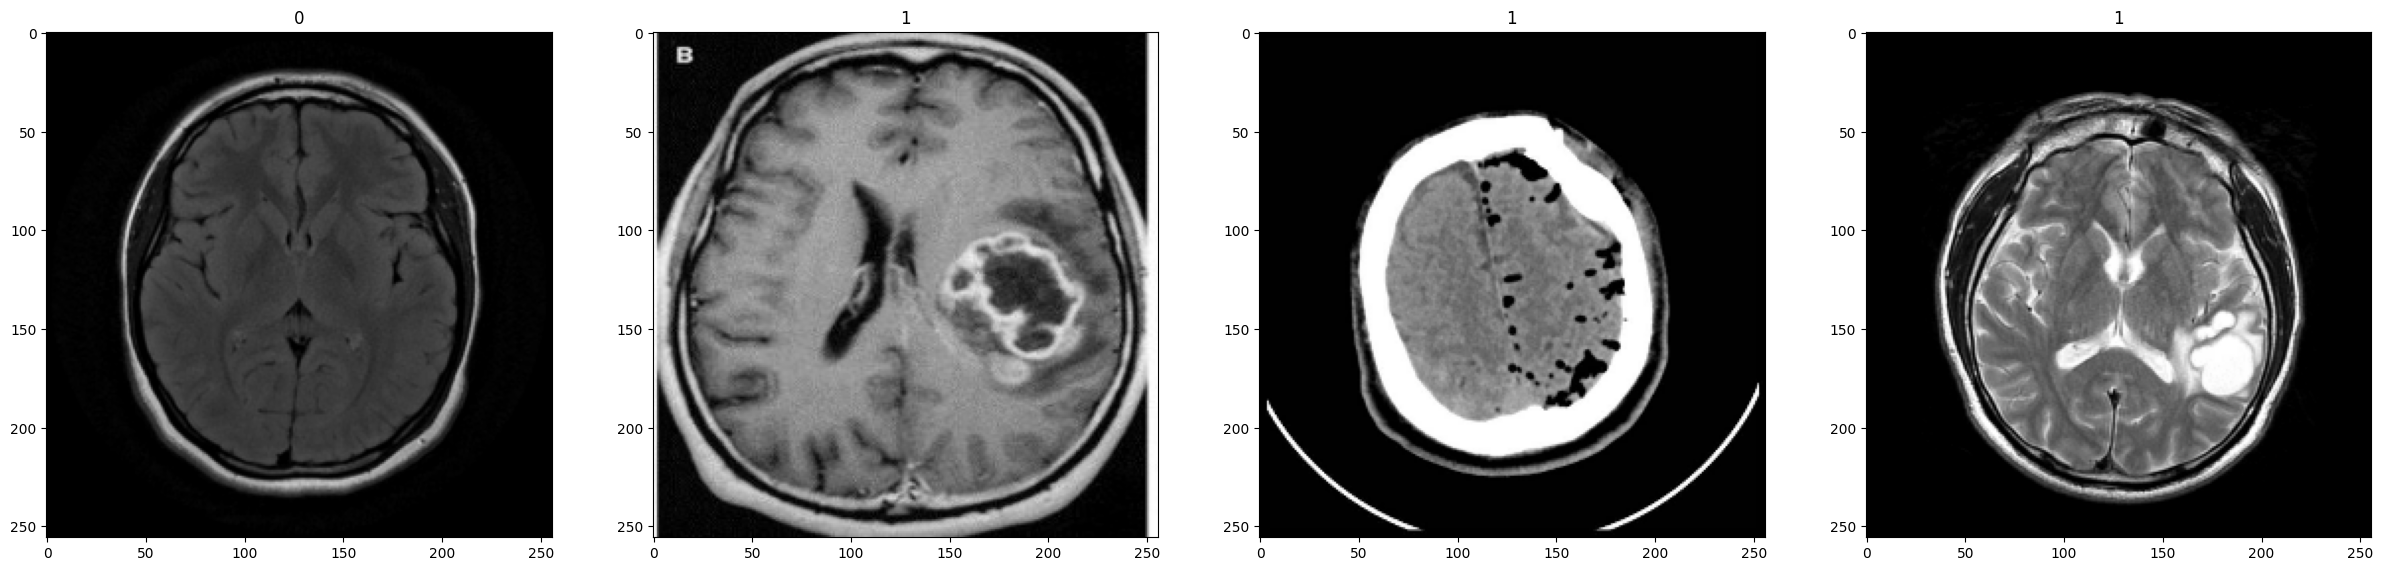

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(30,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[0.00784314, 0.00784314, 0.00784314],
          [0.00784314, 0.00784314, 0.00784314],
          [0.00784314, 0.00784314, 0.00784314],
          ...,
          [0.00784314, 0.00784314, 0.00784314],
          [0.00784314, 0.00784314, 0.00784314],
          [0.00784314, 0.00784314, 0.00784314]],
 
         [[0.00784314, 0.00784314, 0.00784314],
          [0.00784314, 0.00784314, 0.00784314],
          [0.00784314, 0.00784314, 0.00784314],
          ...,
          [0.00784314, 0.00784314, 0.00784314],
          [0.00784314, 0.00784314, 0.00784314],
          [0.00784314, 0.00784314, 0.00784314]],
 
         [[0.00784314, 0.00784314, 0.00784314],
          [0.00784314, 0.00784314, 0.00784314],
          [0.00784314, 0.00784314, 0.00784314],
          ...,
          [0.00784314, 0.00784314, 0.00784314],
          [0.00784314, 0.00784314, 0.00784314],
          [0.00784314, 0.00784314, 0.00784314]],
 
         ...,
 
         [[0.00784314, 0.00784314, 0.00784314],
          [0.00784

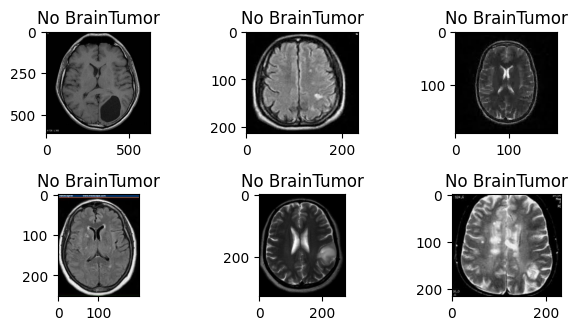

In [18]:
import matplotlib.image as mpimg
train_dir = "/content/drive/MyDrive/New folder/no"
braintumor = os.listdir(train_dir)

# Show the first 6 images
for i in range(6):
    plt.subplot(3, 3, i + 1)
    img = mpimg.imread(os.path.join(train_dir, braintumor[i]))
    plt.title("No BrainTumor")
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

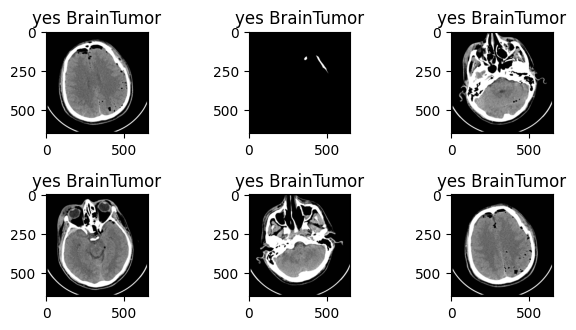

In [19]:
import matplotlib.image as mpimg
train_dir = "/content/drive/MyDrive/New folder/yes"
braintumor = os.listdir(train_dir)

# Show the first 6 images
for i in range(6):
    plt.subplot(3, 3, i + 1)
    img = mpimg.imread(os.path.join(train_dir, braintumor[i]))
    plt.title("yes BrainTumor")
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

In [20]:
no_tumor = "/content/drive/MyDrive/New folder/no"
yes_tumor = "/content/drive/MyDrive/New folder/yes"

filepaths = []
labels= []
dict_list = [no_tumor, yes_tumor]
for i, j in enumerate(dict_list):
    flist=os.listdir(j)
    for f in flist:
        fpath=os.path.join(j,f)
        filepaths.append(fpath)
        if i==0:
          labels.append('No Tumor')
        else:
          labels.append('Yes Tumor')

Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
tumor_data = pd.concat([Fseries,Lseries], axis=1)
tumor_df = pd.DataFrame(tumor_data)
print(tumor_df.head())
print(tumor_df["labels"].value_counts())

                                        filepaths    labels
0    /content/drive/MyDrive/New folder/no/N11.jpg  No Tumor
1  /content/drive/MyDrive/New folder/no/24 no.jpg  No Tumor
2   /content/drive/MyDrive/New folder/no/6 no.jpg  No Tumor
3  /content/drive/MyDrive/New folder/no/31 no.jpg  No Tumor
4    /content/drive/MyDrive/New folder/no/N22.JPG  No Tumor
Yes Tumor    197
No Tumor     117
Name: labels, dtype: int64


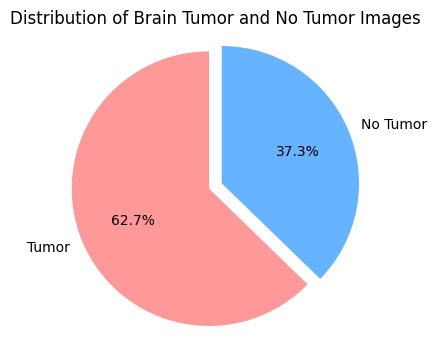

In [21]:
import matplotlib.pyplot as plt

labels = ['Tumor', 'No Tumor']
sizes = [len(tumor_df[tumor_df['labels'] == 'Yes Tumor']), len(tumor_df[tumor_df['labels'] == 'No Tumor'])]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Distribution of Brain Tumor and No Tumor Images')
plt.show()


In [ ]:
#!pip install split-folders

In [ ]:
#import splitfolders

In [ ]:
#splitfolders.ratio("D:/diss/New folder/New folder", output="D:/diss/New folder/split",
#    seed=1337, ratio=(0.6,0.2,0.2), group_prefix=None, move=False)

Copying files: 314 files [00:00, 398.69 files/s]


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir= '/content/drive/MyDrive/split/train'
test_dir= '/content/drive/MyDrive/split/test'
val_dir= '/content/drive/MyDrive/split/val'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./33)
test_datagen = ImageDataGenerator(rescale=1./33)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(32,32),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32,32),
    batch_size=batch_size,
    class_mode='binary'
)

Found 188 images belonging to 2 classes.
Found 62 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


# 5. Split Data

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [24]:
train_size

7

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [26]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [36]:
training_loss = hist.history['loss']
validation_loss = hist.history['val_loss']

training_accuracy = hist.history['accuracy']
validation_accuracy = hist.history['val_accuracy']

print('Training Loss:', training_loss)
print('Validation Loss:', validation_loss)
print('Training Accuracy:', training_accuracy)
print('Validation Accuracy:', validation_accuracy)



Training Loss: [0.6576936841011047, 0.5056407451629639]
Validation Loss: [0.5261381268501282, 0.3677237629890442]
Training Accuracy: [0.6785714030265808, 0.7991071343421936]
Validation Accuracy: [0.671875, 0.890625]


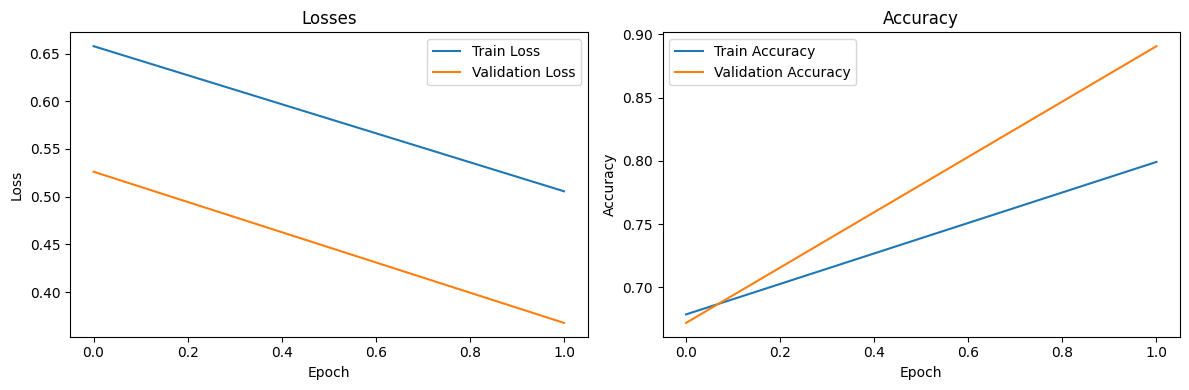

In [37]:
import matplotlib.pyplot as plt

# Plot the loss curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



# 7. Train

In [33]:
logdir='logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
hist = model.fit(train, epochs=2, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/2
7/7 [==============================] - 14s 194ms/step - loss: 0.6577 - accuracy: 0.6786 - val_loss: 0.5261 - val_accuracy: 0.6719
Epoch 2/2
7/7 [==============================] - 2s 171ms/step - loss: 0.5056 - accuracy: 0.7991 - val_loss: 0.3677 - val_accuracy: 0.8906


# 8. Plot Performance

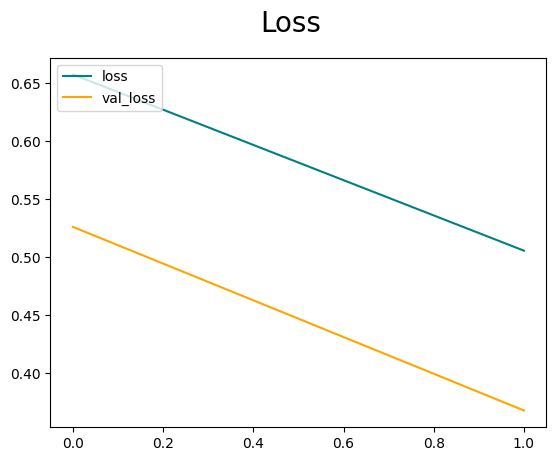

In [38]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

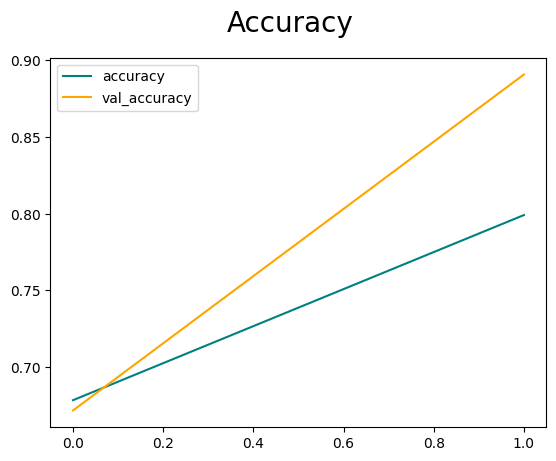

In [39]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [40]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [41]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [42]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 493ms/step


In [43]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.94736844, shape=(), dtype=float32) tf.Tensor(0.9, shape=(), dtype=float32) tf.Tensor(0.88461536, shape=(), dtype=float32)


# 10. Test

In [45]:
data_dir = '/content/drive/MyDrive/New folder'
filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)

In [46]:
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis= 1)

In [47]:
df

,filepaths,labels
0,/content/drive/MyDrive/New folder/yes/24.jpg,yes
1,/content/drive/MyDrive/New folder/yes/21_HGE_S...,yes
2,/content/drive/MyDrive/New folder/yes/12.jpg,yes
3,/content/drive/MyDrive/New folder/yes/16.jpg,yes
4,/content/drive/MyDrive/New folder/yes/10.jpg,yes
...,...,...
309,/content/drive/MyDrive/New folder/no/no 96.jpg,no
310,/content/drive/MyDrive/New folder/no/no 7.jpeg,no
311,/content/drive/MyDrive/New folder/no/No11.jpg,no
312,/content/drive/MyDrive/New folder/no/no 94.jpg,no


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
strat = df['labels']
train_df, test_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123, stratify= strat)

In [49]:
batch_size = 8
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 251 validated image filenames belonging to 2 classes.
Found 63 validated image filenames belonging to 2 classes.


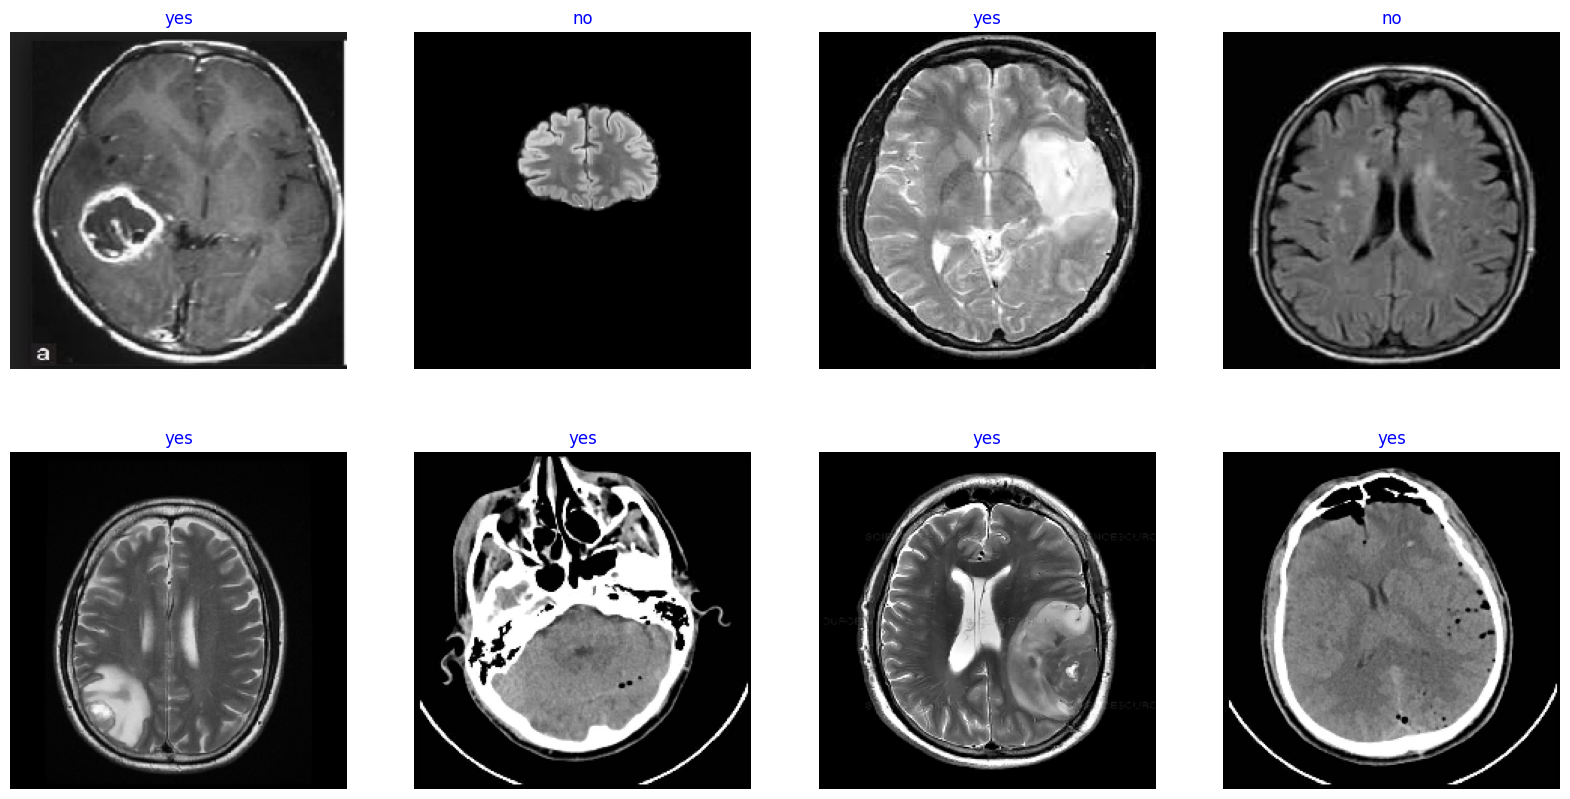

In [50]:
g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)

plt.figure(figsize= (20, 10))

for i in range(8):
    plt.subplot(2, 4, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

# Sequential

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers


In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [53]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))

base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top= False, weights= "imagenet",
                                                               input_shape= img_shape, pooling= 'max')


model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])


model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

43941136/43941136 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1536)              6144      
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                       

In [54]:
epochs = 3

history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= test_gen,
                    validation_steps= None, shuffle= False)

Epoch 1/3
32/32 [==============================] - 72s 280ms/step - loss: 8.1618 - accuracy: 0.7092 - val_loss: 10.8266 - val_accuracy: 0.5556
Epoch 2/3
32/32 [==============================] - 5s 148ms/step - loss: 7.1760 - accuracy: 0.8606 - val_loss: 7.4467 - val_accuracy: 0.9048
Epoch 3/3
32/32 [==============================] - 5s 146ms/step - loss: 6.5441 - accuracy: 0.8884 - val_loss: 6.7530 - val_accuracy: 0.8413


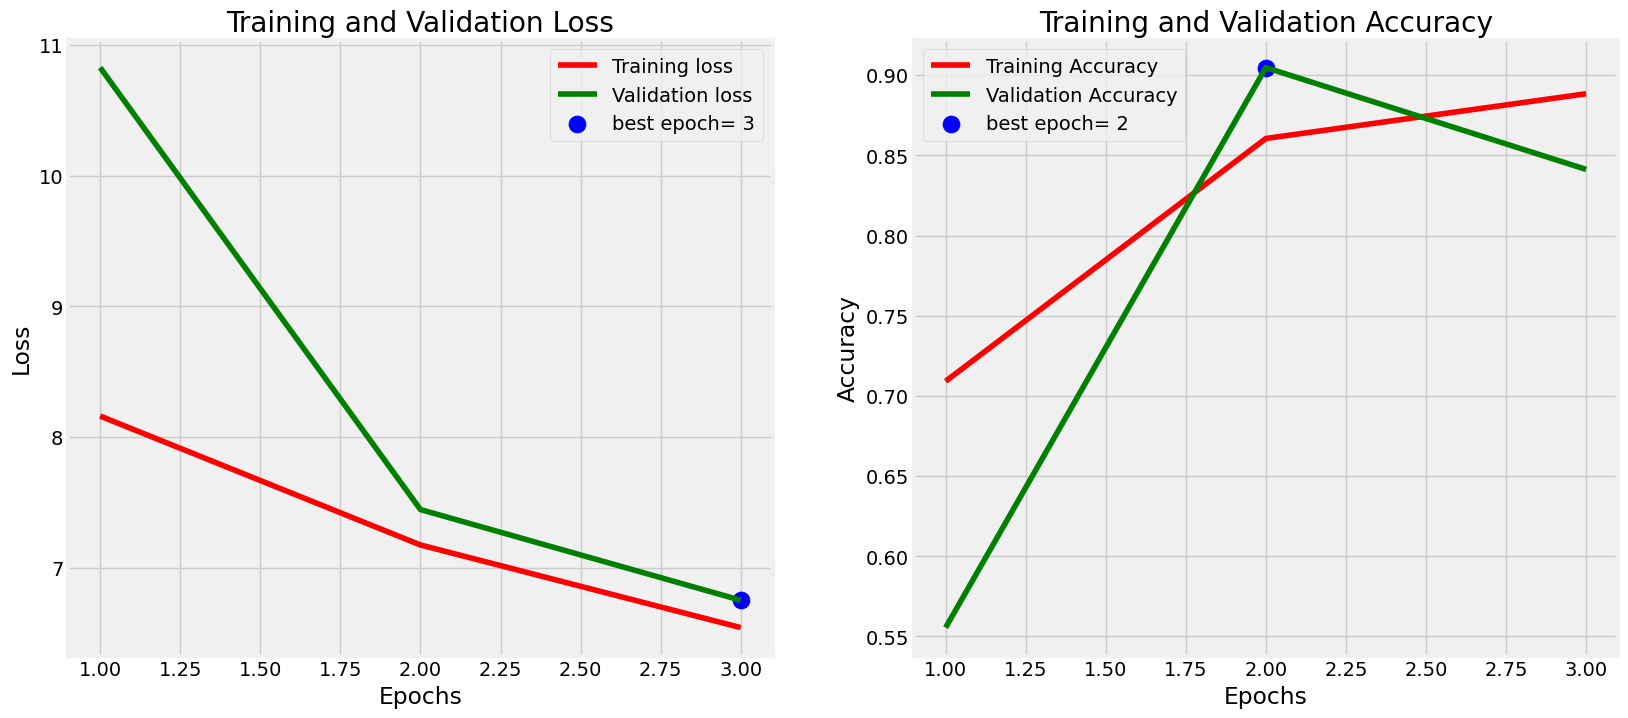

In [55]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [56]:
train_score = model.evaluate(train_gen, verbose= 1)
test_score = model.evaluate(test_gen, verbose= 1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

8/8 [==============================] - 0s 39ms/step - loss: 6.7530 - accuracy: 0.8413
Train Loss:  6.502729892730713
Train Accuracy:  0.9442231059074402
--------------------
Test Loss:  6.752989292144775
Test Accuracy:  0.841269850730896


In [57]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

<ipython-input-57-01135dd8c8ed>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_gen)


In [58]:
import itertools

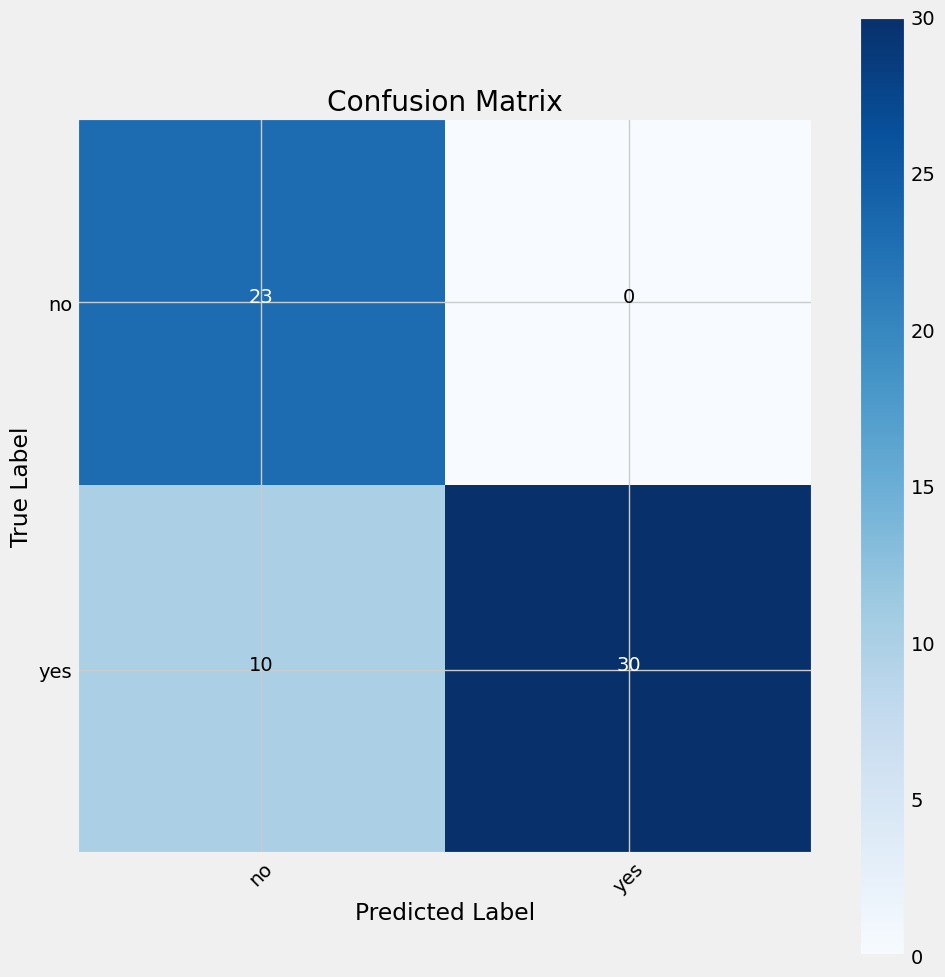

In [59]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

# restnet

In [60]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(244, 244, 3))
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 244, 244, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 250, 250, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 122, 122, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 122, 122, 64)         256       ['conv1_conv[0][0]']          
 on)                         

In [62]:
from tensorflow.keras.callbacks import EarlyStopping
ResNet_history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= test_gen,
                    validation_steps= None, shuffle= False)

Epoch 1/3
32/32 [==============================] - 2s 72ms/step - loss: 0.6944 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/3
32/32 [==============================] - 2s 60ms/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/3
32/32 [==============================] - 1s 46ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [63]:
training_loss_1= ResNet_history.history['loss']
validation_loss_1 = ResNet_history.history['val_loss']
training_accuracy_1 = ResNet_history.history['accuracy']
validation_accuracy_1 = ResNet_history.history['val_accuracy']
print('Training Loss:', training_loss_1)
print('Validation Loss:', validation_loss_1)
print('Training Accuracy:', training_accuracy_1)
print('Validation Accuracy:', validation_accuracy_1)
test_loss_1, test_acc_1 = model.evaluate(train_gen)
print('Test Loss:', test_loss_1)
print('Test Accuracy:', test_acc_1)


Training Loss: [0.694426417350769, 0.6937558650970459, 0.6935083866119385]
Validation Loss: [0.6933687329292297, 0.6932939291000366, 0.6931894421577454]
Training Accuracy: [0.5, 0.5, 0.5]
Validation Accuracy: [0.5, 0.5, 0.5]
32/32 [==============================] - 1s 36ms/step - loss: 0.6932 - accuracy: 0.5000
Test Loss: 0.6932107210159302
Test Accuracy: 0.5


In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
predictions_1 = model.predict(train_gen)
binary_predictions_1 = [1 if pred > 0.5 else 0 for pred in predictions_1]
true_labels_1 = train_gen.classes
accuracy_1 = accuracy_score(true_labels_1, binary_predictions_1)
precision_1 = precision_score(true_labels_1, binary_predictions_1)
recall_1 = recall_score(true_labels_1, binary_predictions_1)
f1 = f1_score(true_labels_1, binary_predictions_1)
print("Accuracy: ", accuracy_1)
print("Precision: ", precision_1)
print("Recall: ", recall_1)
print("F1 Score: ", f1)

32/32 [==============================] - 4s 84ms/step
Accuracy:  0.4900398406374502
Precision:  0.5878787878787879
Recall:  0.6178343949044586
F1 Score:  0.6024844720496894


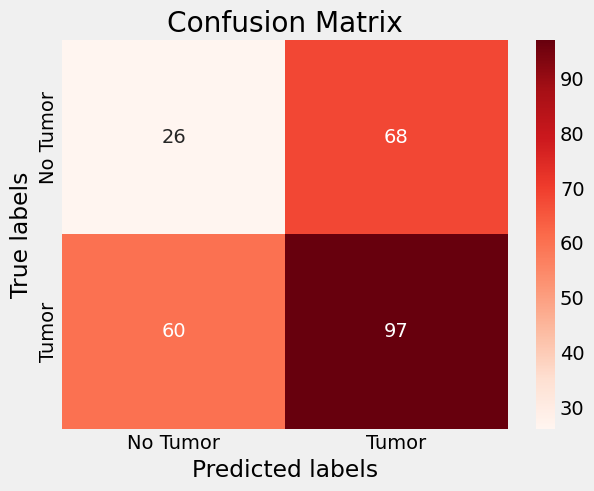

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(true_labels_1, binary_predictions_1)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Reds')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No Tumor', 'Tumor'])
ax.yaxis.set_ticklabels(['No Tumor', 'Tumor'])
plt.show()

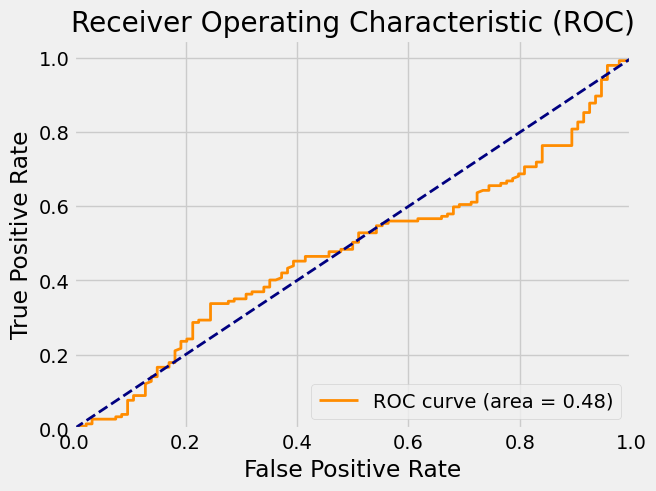

In [66]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(true_labels_1, predictions_1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Inception v3

In [67]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, BatchNormalization
from glob import glob

In [68]:
IMAGE_SIZE = [224, 224]
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [69]:
for layer in inception.layers:
    layer.trainable = False

In [70]:
x = Flatten()(inception.output)

In [71]:
folders = glob(data_dir+'/*')

In [72]:
prediction = Dense(len(folders), activation='softmax')(x)

In [73]:
model = Model(inputs=inception.input, outputs=prediction)

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split=0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [75]:
train_ds = train_datagen.flow_from_directory(data_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = 'categorical',
                                             subset='training',
                                             shuffle = False)

Found 252 images belonging to 2 classes.


In [76]:
val_ds = train_datagen.flow_from_directory(data_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = 'categorical',
                                             subset='validation',
                                             shuffle = False)

Found 62 images belonging to 2 classes.


In [78]:
tf.config.run_functions_eagerly(True)
r = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=30,
)

Epoch 1/30
8/8 [==============================] - 8s 1s/step - loss: 0.2378 - accuracy: 0.9444 - val_loss: 0.9351 - val_accuracy: 0.8226
Epoch 2/30
8/8 [==============================] - 6s 765ms/step - loss: 0.2988 - accuracy: 0.9325 - val_loss: 0.6582 - val_accuracy: 0.8548
Epoch 3/30
8/8 [==============================] - 8s 1s/step - loss: 0.2673 - accuracy: 0.9484 - val_loss: 1.3901 - val_accuracy: 0.8548
Epoch 4/30
8/8 [==============================] - 7s 935ms/step - loss: 0.2901 - accuracy: 0.9246 - val_loss: 0.7546 - val_accuracy: 0.8548
Epoch 5/30
8/8 [==============================] - 8s 967ms/step - loss: 0.1328 - accuracy: 0.9563 - val_loss: 0.6637 - val_accuracy: 0.8710
Epoch 6/30
8/8 [==============================] - 6s 777ms/step - loss: 0.0798 - accuracy: 0.9603 - val_loss: 0.7187 - val_accuracy: 0.8871
Epoch 7/30
8/8 [==============================] - 8s 962ms/step - loss: 0.0233 - accuracy: 0.9960 - val_loss: 1.1239 - val_accuracy: 0.8710
Epoch 8/30
8/8 [==========

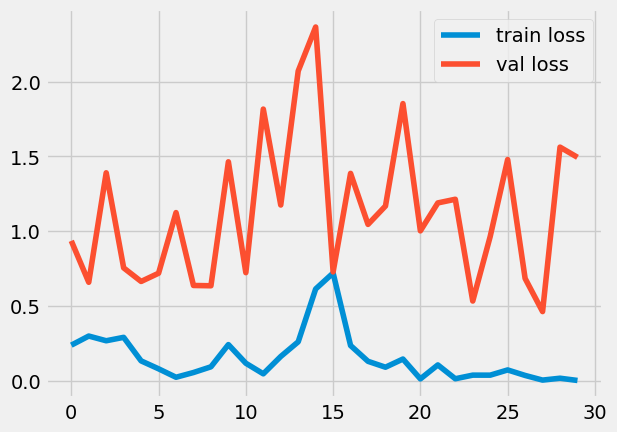

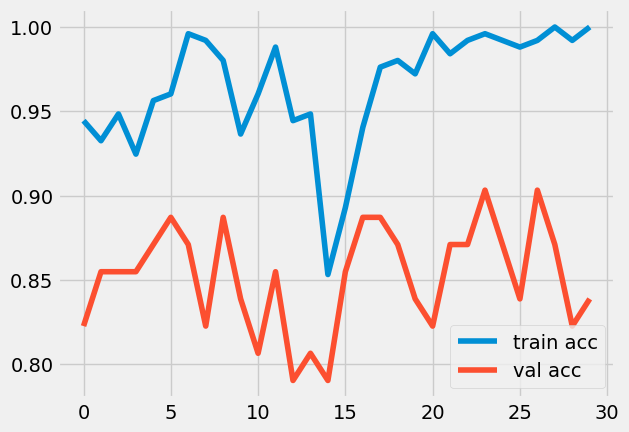

<Figure size 640x480 with 0 Axes>

In [79]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [80]:
probabilities = model.predict_generator(val_ds)
y_pred = np.argmax(probabilities, axis=1)

print(confusion_matrix(val_ds.classes, y_pred))

<ipython-input-80-a5ed8136f877>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  probabilities = model.predict_generator(val_ds)


[[16  7]
 [ 1 38]]


<Axes: >

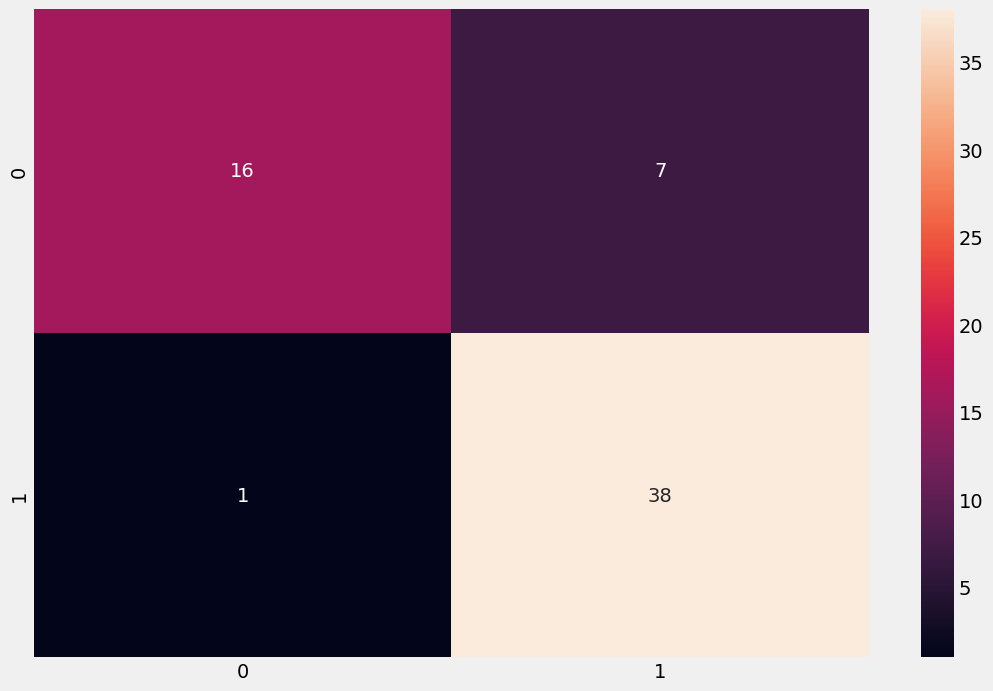

In [81]:
cf_matrix = confusion_matrix(val_ds.classes, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)

In [82]:
print(classification_report(val_ds.classes, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80        23
           1       0.84      0.97      0.90        39

    accuracy                           0.87        62
   macro avg       0.89      0.84      0.85        62
weighted avg       0.88      0.87      0.87        62

